<b>Regresion Lineal</b>

El modelo de pronóstico de regresión lineal permite hallar el valor esperado de una variable aleatoria <b>a</b> cuando <b>b</b> toma un valor específico. La aplicación de este método implica un supuesto de linealidad cuando la demanda presenta un comportamiento creciente o decreciente, por tal razón, se hace indispensable que previo a la selección de este método exista un análisis de regresión que determine la intensidad de las relaciones entre las variables que componen el modelo.

La regresión lineal es un campo de estudio que enfatiza la relación estadística entre dos variables continuas conocidas como variables de predicción y respuesta . Cuando hay más de una variable predictora, se convierte en regresión lineal múltiple.La variable predictora se denota con mayor frecuencia como x y también se conoce como variable independiente.
La variable de respuesta se denota con mayor frecuencia como y y también se conoce como variable dependiente.


El objetivo de un análisis de regresión es determinar la relación que existe entre una variable dependiente y una o más variables independientes. Para poder realizar esta relación, se debe postular una relación funcional entre las variables.

Cuando se trata de una variable independiente, la forma funcional que más se utiliza en la práctica es la relación lineal. El análisis de regresión entonces determina la intensidad entre las variables a través de coeficientes de correlación y determinación.

<b>Algoritmo</b>

En el caso que se use  una sola variable, x, se sabe que una línea necesita 2 parámetros. La fórmula para la regresión lineal con una sola variable x es:

$y = wx+b$

El aprendizaje consiste en encontrar cuáles son los mejores parámetros (coeficientes) para los datos que se tengan. Los mejores coeficientes serán los que minimicen alguna medida de error.

<b>Ejemplo de Regresión Lineal</b>

Se usa regresión lineal para encontrar los parámetros de la línea que minimiza el error de los datos que tenemos. El proceso de aprendizaje consiste en estimar los parámetros w y b. Así  queda  para estos datos, los mejores valores que son: 

In [14]:
import json
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [32]:
data = pd.read_csv("./articulos_ml.csv")
data.shape


(161, 8)

In [33]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


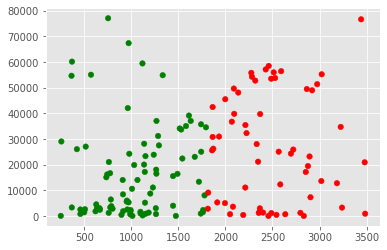

In [34]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
 
colores=['red','green']
tamanios=[30,60]
 
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
 
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [39]:
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values
 
regr = linear_model.LinearRegression()
 
regr.fit(X_train, y_train)
 
y_pred = regr.predict(X_train)
 
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


In [40]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595
22595


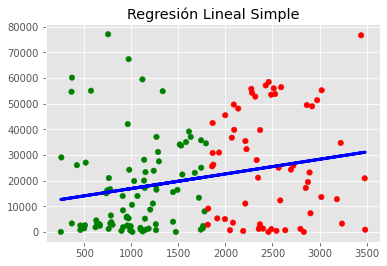

In [46]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
 
colores=['red','green']
tamanios=[30,60]

asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(X_train, y_train, c=asignar, s=tamanios[0])
plt.plot(X_train, y_pred, color='blue', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.show()

In [47]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


**Conclusion**

En conclusion se tiene un Error Cuadrático medio enorme  por lo que en realidad este modelo no es  muy bueno Pero estamos aprendiendo a usarlo esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.